In [21]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from load_params import load_multigroup_params
from multi_group_simulation import MultiGroupSimulation
import matplotlib.pyplot as plt

## from july_15_tompkins_sims.ipynb

In [11]:
# Load parameters from yaml

grp_params, grp_names, interactions_mtx = \
    load_multigroup_params("../src/simulations_v2/params/multigroup/tompkins_vs_cornell.yaml")

/Users/stevewangen/projects/COVID/cornell_reopening/src/simulations_v2/load_params.py:64: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  params = yaml.load(f)
/Users/stevewangen/projects/COVID/cornell_reopening/src/simulations_v2/load_params.py:136: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  params = yaml.load(f)
/Users/stevewangen/projects/COVID/cornell_reopening/src/simulations_v2/load_params.py:45: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  age_sev_params = yaml.load(f)


In [12]:
# initialize a multi-group (school and community) simulation using the read in parameters

multigrp_sim = MultiGroupSimulation(grp_params, interactions_mtx, grp_names)

In [13]:
# Step through the multi-group simulation

num_trajectories = 100
sim_dfs_group_0 = []
sim_dfs_group_1 = []
for _ in range(num_trajectories):
    multigrp_sim.reset_initial_state()
    for _ in range(112):
        multigrp_sim.step()
    sim_dfs_group_0.append(multigrp_sim.sims[0].sim_df)
    sim_dfs_group_1.append(multigrp_sim.sims[1].sim_df)


In [22]:
# Plot infections in each group

def get_popsize(df):
    cols = df.columns
    subdf = df[[col for col in cols if 'cumulative' not in col]]
    return subdf.sum(axis=1).iloc[0]


def add_df_plot(df, label, color):
    popsize = get_popsize(df)
    df[['S', 'QS']].apply(lambda x: (popsize - sum(x)) / popsize * 100, axis=1) \
                        .plot(label=label, alpha=0.1, linewidth=10, color=color)
    
#sim_dfs_group_0 = []
#sim_dfs_group_1 = []


def plot_infections(group_0, group_1):
    add_df_plot(group_0[0], label="Tompkins Community", color='blue')
    for df0 in group_0[1:]:
        add_df_plot(df0, label='', color='blue')

    add_df_plot(group_1[0], label="Cornell Community", color='red')
    for df1 in group_1[1:]:
        add_df_plot(df1, label='', color='red')

    plt.title("Infection trajectory")
    plt.legend(loc='best')

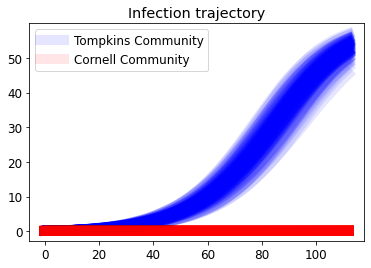

In [23]:
plot_infections(sim_dfs_group_0, sim_dfs_group_1)

## from june_9_sample_path_severity_distribution.ipynb
Trying to get Figures 1 and 2 output from above simulation run

Need to figure out how output from above sim (sim_dfs_group_X) maps to 'dfs' object below, which is otherwise read in from results file (which I am unable to produce at this point).

In [6]:
# ???: what does DFS mean??? -sw
dfs = output.sim_results['Nominal Parameters'][(0.1,)]

NameError: name 'output' is not defined

In [8]:
def figure_01(dfs):
        
    '''
    lifted from june_9_sample_path_severity_distribution.ipynb
    
    '''
    
    plt.figure(figsize=(15,9))
    sample = dfs[0]

    plt.plot(sample[cumulative_cols].sum(axis=1), linewidth=8.0, alpha=0.8, color='blue')
    plt.plot(sample[recovered_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='red')
    plt.plot(sample[active_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='purple')
    plt.plot(sample[free_infectious].sum(axis=1), linewidth=2.5, alpha=0.5, color='green')
    plt.xlabel("Day", size=14)
    plt.ylabel("Number of Active Infections", size=14)
    plt.title('Simulated COVID Progression under Nominal Parameters\n (0.278% outside prevalence, 5-day testing)', size=18)
    plt.legend(('Cumulative people with COVID', 'Recovered', 'Active', 'Free Infectious'), loc='best')
    #sample_high

In [9]:
def figure_02(dfs):
    
    '''
    lifted from june_9_sample_path_severity_distribution.ipynb
    
    '''
    
    # ???: replace df_0 reference w/ dfs[0]? -sw
    
    sample = dfs[0]
    df_0 = sample

    # Metric: Area graph of the number of people in each severity state
    plt.figure(figsize=(15,9))
    y0 = list(df_0['severity_0'])
    y1 = list(df_0['severity_1'])
    y2 = list(df_0['severity_2'])
    y3 = list(df_0['severity_3'])
    x = list(range(len(list(df_0['severity_0']))))

    plt.stackplot(x, y0,y1,y2,y3, labels=['Asymptomatic','Mild','Hospitalized','Critical Care'], alpha=0.7, colors=['grey', 'orange', 'blue', 'red']*10)
    plt.legend(loc='upper left')
    plt.title('Severity Distribution under Nominal Parameters\n (0.278% outside prevalence, 5-day testing)', size=18)
    plt.xlabel('Day', size=14)
    plt.ylabel('Cumulative People in each severity class', size=14)

    # print(list(df_0['severity_0']), list(df_0['severity_1']), list(df_0['severity_2']), list(df_0['severity_3']))
    # print(list(range(len(list(df_0['severity_0'])))))